# SVR -> Support Vecector Regressor

Before geting started with Support vector Regressor, fit lets have a look on support vector machine (SVM).

So SVM is a supervised learning model widly used in classification problems. So what actualy SVM does is it finds a __line or hyperplane(in multidimentional space or n dimentional space)__ in order to seperate two classes. The data points on either side of the line is known as the __support vectors__.

##### Hyperperameters of SVM

1. Hyperplane

Hyperplanes are decision boundaries that is used to predict the continuous output. The data points on either side of the hyperplane that are closest to the hyperplane are called Support Vectors. These are used to plot the required line that shows the predicted output of the algorithm.

2. Kernal

A kernel is a set of mathematical functions that takes data as input and transform it into the required form. These are generally used for finding a hyperplane in the higher dimensional space.The most widely used kernels include __Linear, Non-Linear, Polynomial, Radial Basis Function (RBF) and Sigmoid__. By default, RBF is used as the kernel. Each kernal depends on the dataset.

3. Boundry Line

These are the two lines that are drawn around the hyperplane at a distance of __ε (epsilon)__. It is used to create a margin between the data points.

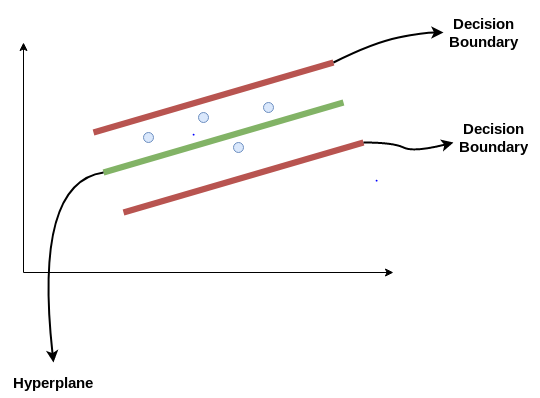



### <b> SVR </b>

The Support Vector Regression is a supervised learning algorithm that relies on the SVM principle the idea behing SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.

Unlike other Regression models that try to minimize the error between the real and predicted value, the SVR tries to fit the best line within a threshold value. The threshold value is the distance between the hyperplane and boundary line.

__For large datasets, Linear SVR or SGD Regressor is used__. Linear SVR provides a faster implementation than SVR but only considers the linear kernel. The model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

#### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Importing the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


#### Seperating independent and dependent variable


In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values.reshape(-1,1) # we have used reshape just to convert the data to vertical form.

#### Feature Scaling

Here we will perform feature scalling for both X and y seperetly.


In [4]:
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_y = StandardScaler()

X = ss_X.fit_transform(X)
y = ss_y.fit_transform(y)

#### Training the SVR model on the whole dataset.

In [5]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
svr.fit(X,y)

c:\users\jay\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

#### Predicting new value using the model

Since we have trained the model in featured scaled data so it will give the output in that range only, so inorder to get the output in original form we have to apply Inverse Feature scalling

Since we have trained the model in featured scaled data so to predict output for a new input we will have to provide the input in scaled format.

In [6]:
y_predict = svr.predict(ss_X.transform([[6.5]])) 
print(y_predict) #without inverse transformaation

# applying inverse scaling to get the original output

print(ss_y.inverse_transform([y_predict]))

[-0.27861589]
[[170370.0204065]]


#### Visualising the SVR result

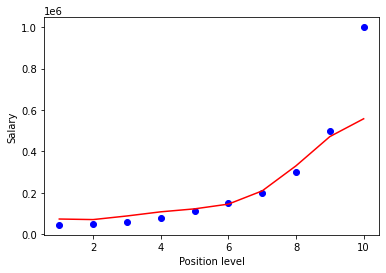

In [7]:
plt.scatter(ss_X.inverse_transform(X),ss_y.inverse_transform(y),color="blue")
plt.plot(ss_X.inverse_transform(X), ss_y.inverse_transform(svr.predict(X).reshape(-1,1)), color="red")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### Visualising the SVR result (for smoother curve)

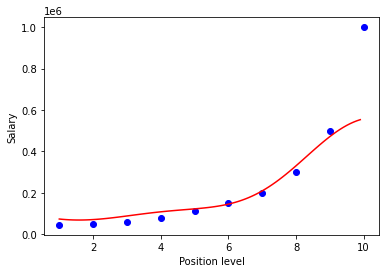

In [8]:
X_grid = np.arange(min(ss_X.inverse_transform(X)), max(ss_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(ss_X.inverse_transform(X),ss_y.inverse_transform(y),color="blue")
plt.plot(X_grid, ss_y.inverse_transform(svr.predict(ss_X.transform(X_grid)).reshape(-1,1)), color="red")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()